# Ecuaciones no lineales - Método de Newton


Dada $f:\mathbb{R}\to\mathbb{R}$, derivable, se plantea el problema de hallar $\alpha \in \mathbb{R}$ tal que:

$$f(\alpha) = 0.$$

En general, $f$ es cualquier función derivable, por lo que no necesariamente es posible "despejar" $\alpha$. Debemos hallar la solución a lo anterior numéricamente.

A modo de ejemplo, consideremos la función:

$$f(x) = 2x-\cos(x).$$


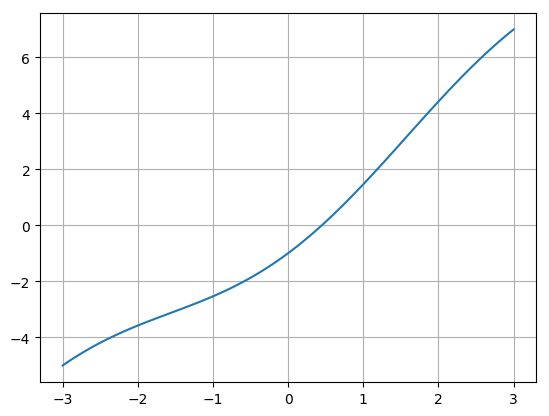

In [1]:
using PyPlot #paquete de graficos

#defino la función a utilizar
function f(x)
    return 2x-cos.(x);
end;

xx=(-3:.05:3) #defino un intervalo de trabajo.

plot(xx,f(xx))
grid()


## Método de Newton

Este método se basa en la siguiente idea: si $x_0$ es un candidato a solución, podemos aproximar $f$ cerca de $x_0$ por la recta:

$$ y = f'(x_0) (x-x_0) + f(x_0).$$

Hallando la raíz de dicha recta, obtenemos una aproximación $x_1$ a la raíz de la función, dada por:

$$ f'(x_0) (x_1-x_0) + f(x_0) = 0 \Rightarrow x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} \quad \text{si }f'(x_0)\neq 0.$$

Luego iteramos el mecanismo, generando entonces la *recursión de Newton*:

$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.$$

### Ejemplo

Corramos una iteración de lo anterior partiendo de $x_0=-2$.

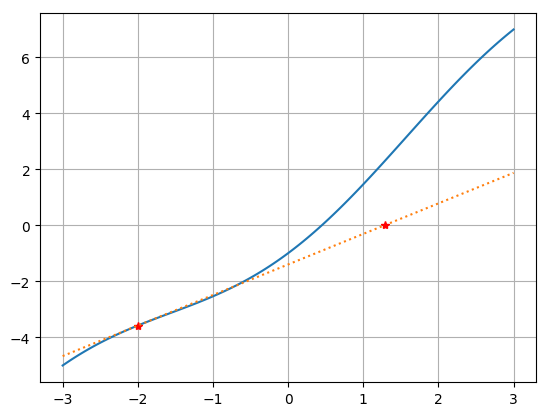

In [2]:
fprima(x) = 2+sin.(x);

x0 = -2;
x1 = x0 - f(x0)/fprima(x0);

plot(xx,f(xx))
plot(x0,f(x0),"*r")
plot(xx,fprima(x0)*(xx.-x0).+f(x0),":")
plot(x1,0,"*r")
grid()

Continuemos la iteración algunas veces graficando cada paso:

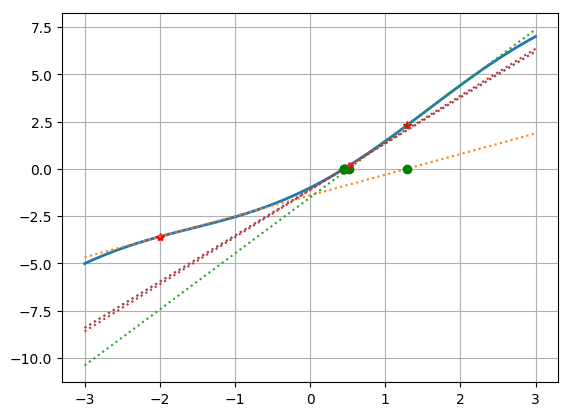

In [3]:
plot(xx,f(xx),linewidth=2.0)

x = -2;
iter = 5;

for i=1:iter
    plot(x,f(x),"*r")
    plot(xx,fprima(x)*(xx.-x).+f(x),":")
    x=x-f(x)/fprima(x);
    plot(x,0,"og")
end

grid()

### Criterio de parada

El algoritmo anterior debe completarse con un *criterio de parada*. Algunos posibles criterios son:

* El error (relativo) de la estimación es menor a cierta tolerancia $tol_1$.
* El valor de la función en el punto es cercano a $0$ a menos de cierta tolerancia $tol_2$.
* El no. de iteraciones realizadas supera un cierto valor $maxiter$.

## Implementación

In [4]:
function newton(f,fprima,x0,tol1,maxiter)
    
    x=x0;
    X=[x];

    #inicializo vectores vacíos para ir completando
    E=Array{Float64}[];
    
    err=Inf;
    k=0;
    
    while err>tol1 && k<maxiter
        
        xviejo=x;
        x=x-f(x)./fprima(x);
        
        err=abs(x-xviejo);
        k=k+1;
        X=[X;x];
        E=[E;err];
    end
    
    return x,k,X,E;
    
end;

x0=-2;
tol=1e-8
maxiter=20;

x,k,X,E = newton(f,fprima,x0,tol,maxiter)

println("Estimación de la raíz: $x")
println("Error: $(E[end])")
println("No. iteraciones: $k")

Estimación de la raíz: 0.45018361129487355
Error: 1.3322676295501878e-15
No. iteraciones: 6


### Evolución del error

Como se ve del ejemplo anterior, la convergencia parece ser bastante más rápida que los métodos anteriores. Analicemos la evolución del error en escala logarítmica:

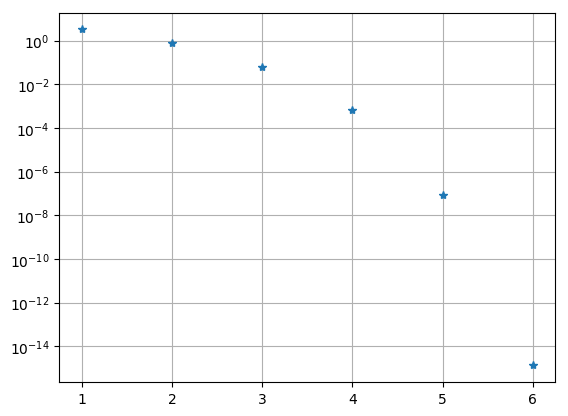

In [5]:
semilogy((1:k),E,"*")
grid()

Recordemos que en bisección por ejemplo, el método es de orden $1$, que se ve lineal en escala logarítmica. Por lo tanto, el método de Newton tiene un orden mayor de convergencia. Podemos verificarlo con el teorema del método iterativo general que ya vimos.

## Orden de convergencia de Newton

> **Proposición:** Si $f$ es dos veces derivable en $\alpha$ y $f'(\alpha)\neq 0$, entonces el método de Newton es al menos de orden $2$.

**Demostración:**

La iteración de Newton está dada por:

$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} = g(x_k).$$

Es decir, Newton es un método iterativo de la misma forma que los MIG ya vistos, pero con una función $g$ particular que se construye a partir de $f$.

Calculemos $g'(x)$:

$$g'(x) = 1 - \frac{f'(x)^2 - f(x)f''(x)}{f'(x)^2} = \frac{f(x)f''(x)}{f'(x)^2}.$$

Si $f'(\alpha)\neq 0$, entonces podemos evaluar lo anterior en la raíz y obtener:

$$g'(\alpha) = \frac{f(\alpha)f''(\alpha)}{f'(\alpha)^2} = 0$$

ya que $f(\alpha)=0$. Por lo tanto, por el Teorema del MIG, el método es al menos de orden $2$.

Si calculamos la derivada segunda ahora de $g$ en $\alpha$ se obtiene:

$$g''(\alpha) = \frac{f''(\alpha)}{f'(\alpha)}.$$

Que en general es distinto de $0$, por lo que en general el método de Newton es de orden $p=2$ con constante:

$$c=\left|\frac{f''(\alpha)}{f'(\alpha)}\right|.$$

## Región de convergencia

Para que el método converja, es necesario utilizar una condición inicial adecuada. Consideremos el siguiente:

### Ejemplo

Considere el polinomio $p(x) = x^3 -6x^2+11x-6$, con $x\in[0,4]$.

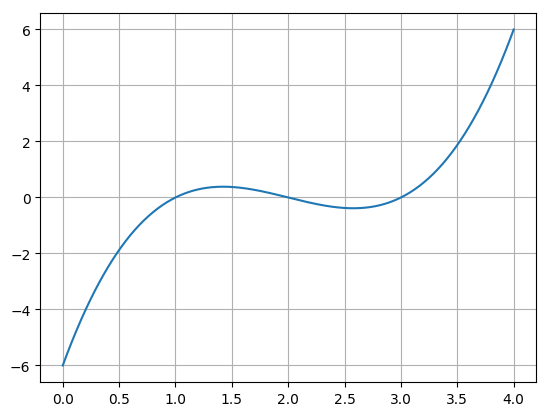

In [6]:
xx=(0:.01:4);

p(x) = x.^3-6x.^2+11x.-6

plot(xx,p(xx))
grid();

Corramos el método de Newton con diferentes condiciones iniciales:

In [7]:
pprima(x) = 3x.^2 -12x+11

x0 = (0:.2:4);
alfas=zeros(size(x0));
tol=1e-10
maxiter=50;

for i=1:length(x0)
    x,k,X,E = newton(p,pprima,x0[i],tol,maxiter);
    alfas[i] = x;
    println("Condicion inicial x0=$(x0[i]), \t Raíz hallada: $x.")
end


Condicion inicial x0=0.0, 	 Raíz hallada: 0.9999999999999999.
Condicion inicial x0=0.2, 	 Raíz hallada: 1.0000000000000004.
Condicion inicial x0=0.4, 	 Raíz hallada: 0.9999999999999999.
Condicion inicial x0=0.6, 	 Raíz hallada: 1.0000000000000002.
Condicion inicial x0=0.8, 	 Raíz hallada: 0.9999999999999994.
Condicion inicial x0=1.0, 	 Raíz hallada: 1.0.
Condicion inicial x0=1.2, 	 Raíz hallada: 0.9999999999999994.
Condicion inicial x0=1.4, 	 Raíz hallada: 0.9999999999999994.
Condicion inicial x0=1.6, 	 Raíz hallada: 1.9999999999999987.
Condicion inicial x0=1.8, 	 Raíz hallada: 1.9999999999999982.
Condicion inicial x0=2.0, 	 Raíz hallada: 2.0.
Condicion inicial x0=2.2, 	 Raíz hallada: 2.000000000000001.
Condicion inicial x0=2.4, 	 Raíz hallada: 1.9999999999999987.
Condicion inicial x0=2.6, 	 Raíz hallada: 3.0.
Condicion inicial x0=2.8, 	 Raíz hallada: 3.0000000000000004.
Condicion inicial x0=3.0, 	 Raíz hallada: 3.0.
Condicion inicial x0=3.2, 	 Raíz hallada: 3.0.
Condicion inicial x0=3

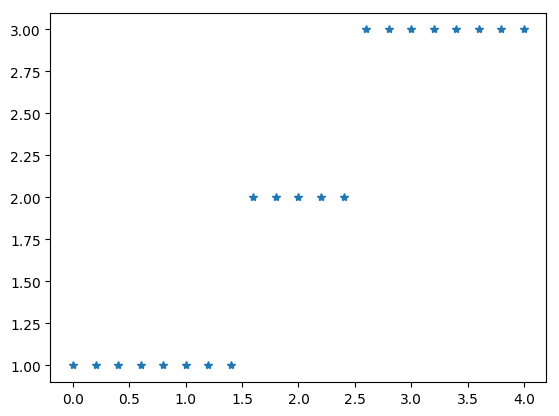

In [8]:
plot(x0,alfas,"*");

### Ejemplo de convergencia lineal

Como vimos, si $f'(\alpha)\neq 0$, el orden de convergencia es $2$. Un caso importante donde lo anterior no se cumple es cuando queremos hallar la raíz doble de un polinomio.

Consideremos el polinomio $p(x) = x^3+3x^2+9x+5$ que tiene raíz doble $x=1$.

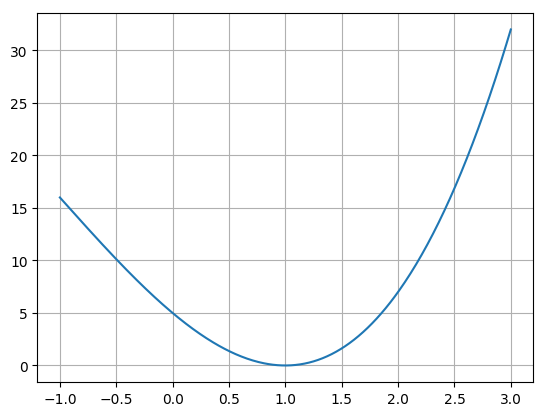

In [9]:
xx=(-1:.01:3);

p(x) = x.^3+3x.^2-9x.+5

plot(xx,p(xx))
grid();

In [10]:
pprima(x) = 3x.^2 + 6x - 9

x0 = 3.0;
tol = 1e-10;
maxiter = 50;

x,k,X,E = newton(p,pprima,x0,tol,maxiter);

println("Estimación de la raíz: $x")
println("Estimación del error: $(E[end])")
println("No. iteraciones: $k")

Estimación de la raíz: 1.0000000075999715
Estimación del error: 0.0
No. iteraciones: 29


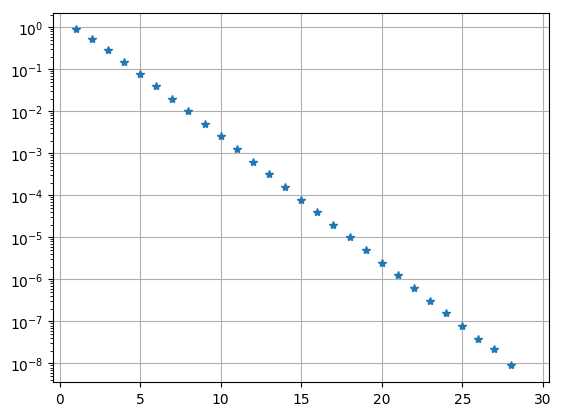

In [11]:
semilogy((1:k),E,"*")
grid();

## Ejercicios

1. Considere la función $f(x) = x\log(x) - x$. Aplique el método de Newton desde diferentes condiciones iniciales en $x>0$ e identifique la región de convergencia. ¿Qué problemas presenta esta función a la hora de aplicar el método?

2. Considere la siguiente variante del método de Newton denominada *método de la Secante*: se tienen dos estimaciones de la raíz $x_1,x_2$ , y se utiliza la recta que pasa por $(x_1,f(x_1))$ y $(x_2.f(x_2))$ como aproximación. La raíz de esta recta "secante" a $f$ es la estimación $x_3$. Luego se itera el método a partir de allí. Implemente este método y compare la velocidad de convergencia con Newton en los ejemplos:

    $$f(x) = 2x-\cos(x),$$ 
    
    $$p(x) = x^3+3x^2+9x+5.$$